In [50]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#filepaths
countypopulation = "resources/countypopulation.csv"
healthdata = "resources/heathdata.csv"
pharmacydata = "resources/pharmacydata.csv"


In [3]:
#pull files into df
healthdata_df = pd.read_csv(healthdata)
healthdata_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,ALE,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
0,1,1,Autauga,Alabama,AL,29,74.9,74.5,78.0,76.5,...,22.8,17.1,15.5,28.2,7.5,4.0,8.8,6,5.4,9.7
1,1,3,Baldwin,Alabama,AL,16,76.6,75.5,78.2,76.5,...,20.4,17.1,12.4,18.3,6.7,5.6,7.4,6,5.7,7.7
2,1,5,Barbour,Alabama,AL,51,74.5,72.3,77.3,76.5,...,31.7,17.1,13.2,29.6,-1111.1,5.5,8.0,6,-1111.1,-1111.1
3,1,7,Bibb,Alabama,AL,42,73.2,73.3,77.8,76.5,...,29.3,17.1,10.1,28.7,-1111.1,4.7,8.2,6,-1111.1,-1111.1
4,1,9,Blount,Alabama,AL,28,76.1,74.9,79.4,76.5,...,24.6,17.1,19.6,32.1,7.9,4.2,7.8,6,6.0,9.8


In [4]:
#clean healthdata and prepare for merging
healthdata_df['CHSI_County_Name'] = healthdata_df['CHSI_County_Name'].str.upper()
healthdata_df['CHSI_State_Name'] = healthdata_df['CHSI_State_Name'].str.upper()
healthdata_df = healthdata_df[['CHSI_County_Name',
       'CHSI_State_Name', 'ALE']]
healthdata_df.rename(columns={'CHSI_County_Name':'COUNTY', 'CHSI_State_Name':'STATE', 'ALE':'AVERAGE LIFE EXPECTANCY'}, inplace=True)
healthdata_df.head()

,COUNTY,STATE,AVERAGE LIFE EXPECTANCY
0,AUTAUGA,ALABAMA,74.9
1,BALDWIN,ALABAMA,76.6
2,BARBOUR,ALABAMA,74.5
3,BIBB,ALABAMA,73.2
4,BLOUNT,ALABAMA,76.1


In [73]:
#import pharmacydata
pharmacydata_df = pd.read_csv(pharmacydata)
pharmacies = pharmacydata_df['PHARMACY_NAME'].unique()
len(pharmacies)
pharmacydata_df['STATE NAME'] = pharmacydata_df['STATE NAME'].str.upper()
pharmacydata_df = pharmacydata_df[['PHARMACY_NAME', 'CITY', 'STATE NAME', 'ZIP', 'COUNTY']]
pharmacydata_df.rename(columns={"STATE NAME": "STATE"}, inplace=True)
pharmacydata_df = pharmacydata_df[pharmacydata_df['STATE'] == 'TEXAS']
pharmacydata_df.head()

,PHARMACY_NAME,CITY,STATE,ZIP,COUNTY
478,BARNES AND WILLIAMS DRUG CENTER # 2,ABILENE,TEXAS,79605,TAYLOR
479,WALMART PHARMACY 10-1118,BALCH SPRINGS,TEXAS,75180,DALLAS
480,UNIVERSITY HEALTH SYSTEM - SW FAMILY HEA,SAN ANTONIO,TEXAS,78237,BEXAR
481,"HILLTOP PHARMACY, INC.",NEW BRAUNFELS,TEXAS,78130,COMAL
482,AMBER PHARMACY,FARMERS BRANCH,TEXAS,75234,DALLAS


In [74]:
#import citypopulation
citypopulation_df = pd.read_csv(countypopulation, encoding="cp1252")
citypopulation_df['CTYNAME'] = citypopulation_df['CTYNAME'].str.upper()
citypopulation_df['STNAME'] = citypopulation_df['STNAME'].str.upper()
name = citypopulation_df['CTYNAME'].str.split(' ', n=1, expand=True)
citypopulation_df['COUNTY'] = name[0]
citypopulation_df.rename(columns={'STNAME': 'STATE', 'POPESTIMATE2017': '2017_EST_POP'}, inplace=True)
citypopulation_df.head()

,STATE,CTYNAME,2017_EST_POP,COUNTY
0,ALABAMA,AUTAUGA COUNTY,55504,AUTAUGA
1,ALABAMA,BALDWIN COUNTY,212628,BALDWIN
2,ALABAMA,BARBOUR COUNTY,25270,BARBOUR
3,ALABAMA,BIBB COUNTY,22668,BIBB
4,ALABAMA,BLOUNT COUNTY,58013,BLOUNT


In [76]:
intermediate_df = citypopulation_df.merge(pharmacydata_df,how='left', on=['STATE', 'COUNTY'])
final_df = intermediate_df.merge(healthdata_df,how='left', on=['STATE', 'COUNTY'])

In [75]:
final_df[final_df['PHARMACY_NAME'].isna()].count()

STATE                      0
CTYNAME                    0
2017_EST_POP               0
COUNTY                     0
PHARMACY_NAME              0
CITY                       0
ZIP                        0
AVERAGE LIFE EXPECTANCY    0
dtype: int64

In [9]:
#final_df = final_df.fillna('NOT FOUND')

In [64]:
#final_df[final_df['PHARMACY_NAME'].str.contains('WALMART')]

In [77]:
pharmacycount_df = pharmacydata_df[['COUNTY', 'STATE', 'PHARMACY_NAME']].groupby(by=['COUNTY', 'STATE']).count()
pharmacycount_df.rename(columns={'PHARMACY_NAME': 'PHARMACY_COUNT'}, inplace=True)


In [78]:
concentration_df = pharmacycount_df.merge(citypopulation_df, how='inner', on=['STATE', 'COUNTY'])

In [79]:
concentration_df['PHARMACY_CONCENTRACTION'] = (concentration_df['PHARMACY_COUNT']/concentration_df['2017_EST_POP'])*1000

In [80]:
analysis_df = concentration_df.merge(healthdata_df, how='inner', on=['COUNTY', 'STATE'])
analysis_df.head()

,STATE,COUNTY,PHARMACY_COUNT,CTYNAME,2017_EST_POP,PHARMACY_CONCENTRACTION,AVERAGE LIFE EXPECTANCY
0,TEXAS,ANDERSON,12,ANDERSON COUNTY,57741,0.207825,72.0
1,TEXAS,ANDREWS,5,ANDREWS COUNTY,17722,0.282135,75.5
2,TEXAS,ANGELINA,27,ANGELINA COUNTY,87805,0.307500,75.0
3,TEXAS,ARANSAS,6,ARANSAS COUNTY,25572,0.234632,75.2
4,TEXAS,ARCHER,1,ARCHER COUNTY,8809,0.113520,75.8


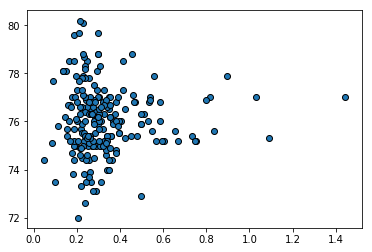

In [81]:
plt.scatter(x=analysis_df['PHARMACY_CONCENTRACTION'], y=analysis_df['AVERAGE LIFE EXPECTANCY'], edgecolor='black')

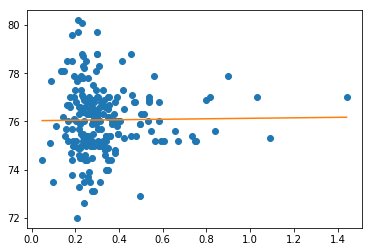

In [82]:
x = analysis_df['PHARMACY_CONCENTRACTION']
y = analysis_df['AVERAGE LIFE EXPECTANCY']
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
x_new = np.linspace(x.min(), x.max(), 1000)
y_new = p(x_new)
plt.plot(x,y,'o', x_new, y_new)